In [1]:
import sys
import importlib as imp
sys.path.insert(0, r"C:\users\pairwin\Documents\Github\HelperPI")
#sys.path.insert(0, r'/home/phillip/Documents/GitHub/HelperPI/')
#imp.reload(HelperPI)
import HelperPI
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import scipy.stats as stats
import numpy as np
import math

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11,8)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
helper = HelperPI.Helper()

INFO:root:Initializing...
INFO:root:Finished


In [4]:
sql = helper.getSQL(path=r'C:\Users\pairwin\Documents\GitHub\IPy_Notebooks\SQL\Q4_Buyer.sql')
base, dtypedf = helper.readData(sql)

INFO:root:Reading data...
INFO:root:Data read complete...
INFO:root:Read: 100000 rows.


                             Count Column Type
0                          CONT_ID       int64
1                        CUST_TYPE      object
2              BPS_OUTDOOR_REWARDS      object
3            BPS_PREFERRED_REWARDS      object
4                      CAB_REWARDS      object
5                         CAB_CLUB      object
6                         NEW_CLUB      object
7                 COMBINED_LOYALTY      object
8                    COMBINED_CLUB      object
9                     CHANNEL_TYPE      object
10               CHANNEL_TYPE_24MO      object
11                    TOTAL_VISITS       int64
12                TOTAL_BPS_VISITS       int64
13                TOTAL_CAB_VISITS       int64
14               TOTAL_VISITS_24MO       int64
15                TIME_AS_CUSTOMER       int64
16             AVG_DAYS_BTW_VISITS     float64
17        DAYS_SINCE_LAST_PURCHASE       int64
18                     TOTAL_SALES     float64
19                    RETAIL_SALES     float64
20         RE

In [10]:
collist = ['CUST_TYPE','CHANNEL_TYPE','CHANNEL_TYPE_24MO','TOTAL_VISITS','TOTAL_BPS_VISITS',
          'TOTAL_CAB_VISITS','TOTAL_VISITS_24MO','TIME_AS_CUSTOMER','AVG_DAYS_BTW_VISITS','DAYS_SINCE_LAST_PURCHASE',
          'TOTAL_SALES','RETAIL_SALES','RETAIL_SALES_PROPORTION','TOTAL_UNITS','TOTAL_SALES_24MO','RETAIL_SALES_24MO',
          'RETAIL_SALES_PROPORTION_24MO','TOTAL_UNITS_24MO','TOTAL_PPU','TOTAL_PPU_24MO','TOTAL_PPU_LYQTR',
          'BPS_SALES_24MO','BPS_UNITS_24MO','CAB_SALES_24MO','CAB_UNITS_24MO','BPS_PPU_24MO','CAB_PPU_24MO',
          'D100_SALES_24MO','D100_UNITS_24MO','D151_SALES_24MO','D151_UNITS_24MO','D175_SALES_24MO','D175_UNITS_24MO',
          'D200_SALES_24MO','D200_UNITS_24MO','D300_SALES_24MO','D300_UNITS_24MO','D350_SALES_24MO','D350_UNITS_24MO',
          'D400_SALES_24MO','D400_UNITS_24MO','D450_SALES_24MO','D450_UNITS_24MO','D475_SALES_24MO','D475_UNITS_24MO',
          'D500_SALES_24MO','D500_UNITS_24MO','D600_SALES_24MO','D600_UNITS_24MO','D650_SALES_24MO','D650_UNITS_24MO',
          'D675_SALES_24MO','D675_UNITS_24MO','D700_SALES_24MO','D700_UNITS_24MO','D100_PPU_24MO','D151_PPU_24MO',
          'D175_PPU_24MO','D200_PPU_24MO','D300_PPU_24MO','D350_PPU_24MO','D400_PPU_24MO','D450_PPU_24MO','D475_PPU_24MO',
          'D500_PPU_24MO','D600_PPU_24MO','D650_PPU_24MO','D675_PPU_24MO','D700_PPU_24MO','TOTAL_SALES_LYQTR','TOTAL_UNITS_LYQTR',
          'BPS_SALES_LYQTR','BPS_UNITS_LYQTR','CAB_SALES_LYQTR','CAB_UNITS_LYQTR','BPS_PPU_LYQTR','CAB_PPU_LYQTR',
          'D100_24MO_PROPORTION','D151_24MO_PROPORTION','D175_24MO_PROPORTION','D200_24MO_PROPORTION','D300_24MO_PROPORTION',
          'D350_24MO_PROPORTION','D400_24MO_PROPORTION','D475_24MO_PROPORTION','D500_24MO_PROPORTION','D600_24MO_PROPORTION',
          'D650_24MO_PROPORTION','D675_24MO_PROPORTION','D700_24MO_PROPORTION','VISITS_BY_TIME_INTER','VISITS_BY_AVG_DAYS_INTER',
          'VISITS_BY_DAYS_SINCE_INTER','VISITS_BY_LYQTY_UNITS_INTER','TIME_BY_AVG_DAYS_INTER','TIME_BY_DAYS_SINCE_LAST_INTER',
          'TIME_BY_LYQTR_UNITS_INTER','PERCENT_BPS_VISTS','PERCENT_24MO_VISTS','TARGET_Q4_PURCHASE']

collist_X = ['CUST_TYPE','CHANNEL_TYPE','CHANNEL_TYPE_24MO','TOTAL_VISITS','TOTAL_BPS_VISITS',
          'TOTAL_CAB_VISITS','TOTAL_VISITS_24MO','TIME_AS_CUSTOMER','AVG_DAYS_BTW_VISITS','DAYS_SINCE_LAST_PURCHASE',
          'TOTAL_SALES','RETAIL_SALES','RETAIL_SALES_PROPORTION','TOTAL_UNITS','TOTAL_SALES_24MO','RETAIL_SALES_24MO',
          'RETAIL_SALES_PROPORTION_24MO','TOTAL_UNITS_24MO','TOTAL_PPU','TOTAL_PPU_24MO','TOTAL_PPU_LYQTR',
          'BPS_SALES_24MO','BPS_UNITS_24MO','CAB_SALES_24MO','CAB_UNITS_24MO','BPS_PPU_24MO','CAB_PPU_24MO',
          'D100_SALES_24MO','D100_UNITS_24MO','D151_SALES_24MO','D151_UNITS_24MO','D175_SALES_24MO','D175_UNITS_24MO',
          'D200_SALES_24MO','D200_UNITS_24MO','D300_SALES_24MO','D300_UNITS_24MO','D350_SALES_24MO','D350_UNITS_24MO',
          'D400_SALES_24MO','D400_UNITS_24MO','D450_SALES_24MO','D450_UNITS_24MO','D475_SALES_24MO','D475_UNITS_24MO',
          'D500_SALES_24MO','D500_UNITS_24MO','D600_SALES_24MO','D600_UNITS_24MO','D650_SALES_24MO','D650_UNITS_24MO',
          'D675_SALES_24MO','D675_UNITS_24MO','D700_SALES_24MO','D700_UNITS_24MO','D100_PPU_24MO','D151_PPU_24MO',
          'D175_PPU_24MO','D200_PPU_24MO','D300_PPU_24MO','D350_PPU_24MO','D400_PPU_24MO','D450_PPU_24MO','D475_PPU_24MO',
          'D500_PPU_24MO','D600_PPU_24MO','D650_PPU_24MO','D675_PPU_24MO','D700_PPU_24MO','TOTAL_SALES_LYQTR','TOTAL_UNITS_LYQTR',
          'BPS_SALES_LYQTR','BPS_UNITS_LYQTR','CAB_SALES_LYQTR','CAB_UNITS_LYQTR','BPS_PPU_LYQTR','CAB_PPU_LYQTR',
          'D100_24MO_PROPORTION','D151_24MO_PROPORTION','D175_24MO_PROPORTION','D200_24MO_PROPORTION','D300_24MO_PROPORTION',
          'D350_24MO_PROPORTION','D400_24MO_PROPORTION','D475_24MO_PROPORTION','D500_24MO_PROPORTION','D600_24MO_PROPORTION',
          'D650_24MO_PROPORTION','D675_24MO_PROPORTION','D700_24MO_PROPORTION','VISITS_BY_TIME_INTER','VISITS_BY_AVG_DAYS_INTER',
          'VISITS_BY_DAYS_SINCE_INTER','VISITS_BY_LYQTY_UNITS_INTER','TIME_BY_AVG_DAYS_INTER','TIME_BY_DAYS_SINCE_LAST_INTER',
          'TIME_BY_LYQTR_UNITS_INTER','PERCENT_BPS_VISTS','PERCENT_24MO_VISTS']

collist_X_num = ['TOTAL_VISITS','TOTAL_BPS_VISITS',
          'TOTAL_CAB_VISITS','TOTAL_VISITS_24MO','TIME_AS_CUSTOMER','AVG_DAYS_BTW_VISITS','DAYS_SINCE_LAST_PURCHASE',
          'TOTAL_SALES','RETAIL_SALES','RETAIL_SALES_PROPORTION','TOTAL_UNITS','TOTAL_SALES_24MO','RETAIL_SALES_24MO',
          'RETAIL_SALES_PROPORTION_24MO','TOTAL_UNITS_24MO','TOTAL_PPU','TOTAL_PPU_24MO','TOTAL_PPU_LYQTR',
          'BPS_SALES_24MO','BPS_UNITS_24MO','CAB_SALES_24MO','CAB_UNITS_24MO','BPS_PPU_24MO','CAB_PPU_24MO',
          'D100_SALES_24MO','D100_UNITS_24MO','D151_SALES_24MO','D151_UNITS_24MO','D175_SALES_24MO','D175_UNITS_24MO',
          'D200_SALES_24MO','D200_UNITS_24MO','D300_SALES_24MO','D300_UNITS_24MO','D350_SALES_24MO','D350_UNITS_24MO',
          'D400_SALES_24MO','D400_UNITS_24MO','D450_SALES_24MO','D450_UNITS_24MO','D475_SALES_24MO','D475_UNITS_24MO',
          'D500_SALES_24MO','D500_UNITS_24MO','D600_SALES_24MO','D600_UNITS_24MO','D650_SALES_24MO','D650_UNITS_24MO',
          'D675_SALES_24MO','D675_UNITS_24MO','D700_SALES_24MO','D700_UNITS_24MO','D100_PPU_24MO','D151_PPU_24MO',
          'D175_PPU_24MO','D200_PPU_24MO','D300_PPU_24MO','D350_PPU_24MO','D400_PPU_24MO','D450_PPU_24MO','D475_PPU_24MO',
          'D500_PPU_24MO','D600_PPU_24MO','D650_PPU_24MO','D675_PPU_24MO','D700_PPU_24MO','TOTAL_SALES_LYQTR','TOTAL_UNITS_LYQTR',
          'BPS_SALES_LYQTR','BPS_UNITS_LYQTR','CAB_SALES_LYQTR','CAB_UNITS_LYQTR','BPS_PPU_LYQTR','CAB_PPU_LYQTR',
          'D100_24MO_PROPORTION','D151_24MO_PROPORTION','D175_24MO_PROPORTION','D200_24MO_PROPORTION','D300_24MO_PROPORTION',
          'D350_24MO_PROPORTION','D400_24MO_PROPORTION','D475_24MO_PROPORTION','D500_24MO_PROPORTION','D600_24MO_PROPORTION',
          'D650_24MO_PROPORTION','D675_24MO_PROPORTION','D700_24MO_PROPORTION','VISITS_BY_TIME_INTER','VISITS_BY_AVG_DAYS_INTER',
          'VISITS_BY_DAYS_SINCE_INTER','VISITS_BY_LYQTY_UNITS_INTER','TIME_BY_AVG_DAYS_INTER','TIME_BY_DAYS_SINCE_LAST_INTER',
          'TIME_BY_LYQTR_UNITS_INTER','PERCENT_BPS_VISTS','PERCENT_24MO_VISTS']

collist_x_nonum = ['CUST_TYPE','CHANNEL_TYPE','CHANNEL_TYPE_24MO']


#collist_y = ['SALES_TARGET_N12_CBRT']


collist_y = ['TARGET_Q4_PURCHASE']

In [8]:
train, test = helper.splitData(base[collist], .8)

train, val = helper.splitData(train, 0.5)

print(train.shape, val.shape, test.shape)

train_X = train[collist_X]

train_y = train[collist_y].as_matrix().ravel()
val_X = val[collist_X]
val_y = val[collist_y].as_matrix().ravel()
test_X = test[collist_X]
test_y = test[collist_y].as_matrix().ravel()


#interactions = helper.find_iteractions(train_X, train_y)
#interactions.to_csv('interactions.csv')

(40000, 107) (40000, 107) (20000, 107)


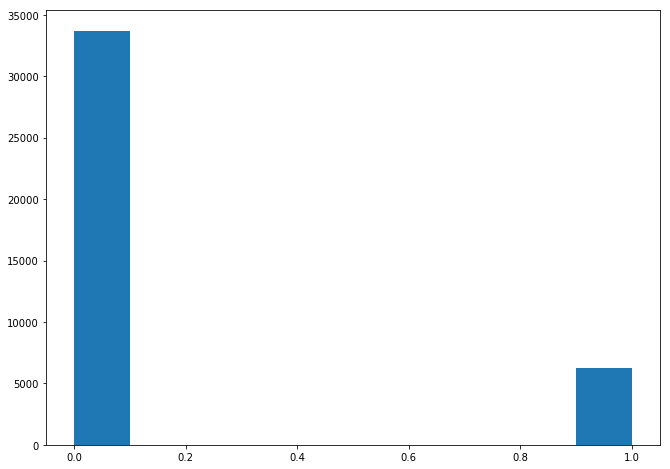

In [9]:
plt.hist(train_y, bins = 10)
plt.show()